In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

In [79]:
sm_010 = np.load('./mcmc_DIM3_sfr_0_1_0_mfr_3.29685E+15_7.88411E+15_6.83344E+15_fix_scale_0.1_sigma_100000_proc.npy')
sm_100 = np.load('./mcmc_DIM3_sfr_1_0_0_mfr_1.98171E+16_6.59371E+15_9.61795E+15_fix_scale_0.1_sigma_100000_proc.npy')
sm_120 = np.load('./mcmc_DIM3_sfr_1_2_0_mfr_5.50076E+15_6.35502E+15_6.15862E+15_fix_scale_0.1_sigma_10000000_proc.npy')
sm_120_uni = np.load('./mcmc_unitary_DIM3_sfr_1_2_0_mfr_5.50076E+15_6.35502E+15_6.15862E+15_fix_scale_0.1_sigma_10000000_proc.npy')

bsm_010 = np.load('./mcmc_chains_DIM3_sfr_0_1_0_mfr_0_1_0_MixingScenario.T13_sigma_010.npy')
bsm_100 = np.load('./mcmc_chains_DIM3_sfr_1_0_0_mfr_1_0_0_MixingScenario.T23_sigma_010.npy')

In [4]:
print sm_010.shape, sm_100.shape, sm_120.shape

(40000, 3) (40000, 3) (10000, 3)


In [5]:
print sm_120

[[0.37553977 0.32469747 0.29976276]
 [0.35422184 0.32631003 0.31946813]
 [0.35422184 0.32631003 0.31946813]
 ...
 [0.3765814  0.33614714 0.28727146]
 [0.3765814  0.33614714 0.28727146]
 [0.3765814  0.33614714 0.28727146]]


In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.legend_handler import HandlerPatch
import matplotlib.gridspec as gridspec

from scipy import interpolate

import ternary

In [7]:
bc = np.genfromtxt('./bayes_contours.csv', delimiter=',', skip_header=2)
print bc

def swap(x):
    y = x.T
    return np.vstack([y[1], y[-1], y[0]]).T

def interp(i):
    x, y, z = i.T
    p = np.linspace(0, 1, len(x))
    q = np.linspace(0, 1, 100)
    s = 0.2
    x_ = interpolate.splev(q, interpolate.splrep(p, x, s=s))
    y_ = interpolate.splev(q, interpolate.splrep(p, y, s=s))
    z_ = interpolate.splev(q, interpolate.splrep(p, z, s=s))
    return np.vstack([x_, y_, z_]).T

contour_68_upper = interp(swap(bc[:,:3]))
contour_68_lower = interp(swap(bc[:,3:6]))
contour_90_upper = interp(swap(bc[:,6:9]))
contour_90_lower = interp(swap(bc[:,9:]))

[[4.24138244e-03 3.06813681e-01 6.88944937e-01 2.34316066e-03
  6.42617953e-01 3.55038887e-01 3.98424527e-03 2.38034475e-01
  7.57981280e-01 1.85873303e-03 7.47360118e-01 2.50781149e-01]
 [1.02100395e-01 2.38679390e-01 6.59220214e-01 2.26570797e-01
  4.93377801e-01 2.80051402e-01 1.09359466e-01 1.65212361e-01
  7.25428173e-01 2.35934718e-01 6.08010059e-01 1.56055223e-01]
 [2.52239502e-01 1.42289922e-01 6.05470576e-01 4.15291021e-01
  3.59870470e-01 2.24838509e-01 2.33469416e-01 8.91797869e-02
  6.77350797e-01 4.52535945e-01 4.33980928e-01 1.13483126e-01]
 [3.68351571e-01 8.26973453e-02 5.48951083e-01 5.92164115e-01
  1.97335547e-01 2.10500337e-01 3.26662769e-01 3.83846610e-02
  6.34952570e-01 6.48292082e-01 2.61042953e-01 9.06649650e-02]
 [5.16972192e-01 1.91319942e-03 4.81114609e-01 7.41232430e-01
  1.98363517e-03 2.56783935e-01 3.86792430e-01 8.82077324e-04
  6.12325493e-01 9.06104571e-01 3.59369535e-03 9.03017336e-02]]


In [8]:
plt.style.use('./paper.mplstyle')

In [9]:
class HandlerCircle(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height,
                       fontsize, trans):
        r = 10
        x = r + width//2 + 10
        y = height//2 - 3

        # create 
        p = Circle(xy=(x, y), radius=r)

        # update with data from oryginal object
        self.update_prop(p, orig_handle, legend)

        # move xy to legend
        p.set_transform(trans)

        return [p]

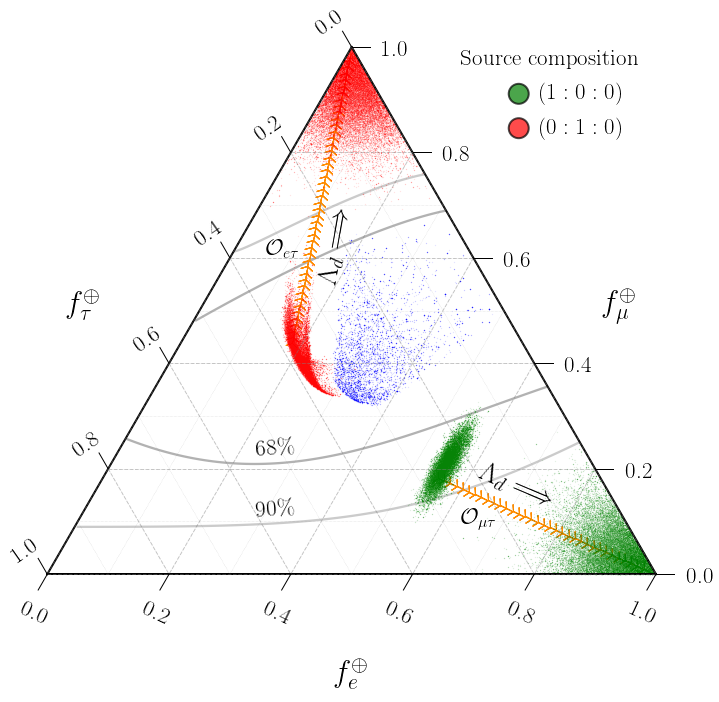

In [71]:
# Figure
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

# Boundary and Gridlines
scale = 1
fig, tax = ternary.figure(ax=ax, scale=scale)

# Draw Boundary and Gridlines
tax.boundary(linewidth=2.0)
tax.gridlines(color='grey', multiple=scale/5., linewidth=1.0, alpha=0.4, ls='--')
tax.gridlines(color='grey', multiple=scale/10., linewidth=0.5, alpha=0.4, ls=':')

# Set Axis labels and Title
fontsize = 23
tax.left_axis_label(r"$f_{\tau}^{\oplus}$", fontsize=fontsize+8, offset=0.2, rotation=0)
tax.right_axis_label(r"$f_{\mu}^{\oplus}$", fontsize=fontsize+8, offset=0.2, rotation=0)
tax.bottom_axis_label(r"$f_{e}^{\oplus}$", fontsize=fontsize+8, position=(0.55, -0.20/2, 0.5), rotation=0)

# Remove default Matplotlib axis
tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()

# Plot
tax.scatter(sm_010, marker='.', s=0.2, alpha=0.2, color='red')
tax.scatter(sm_100, marker='.', s=0.2, alpha=0.2, color='green')
tax.scatter(sm_120_uni, marker='.', s=0.2, alpha=0.2, color='blue')
tax.scatter(bsm_010, marker='.', s=0.2, alpha=0.2, color='red')
tax.scatter(bsm_100, marker='.', s=0.2, alpha=0.2, color='green')

# Contour
tax.plot(contour_68_upper, linewidth=2.3, color='grey', zorder=0, alpha=0.6)
tax.plot(contour_68_lower, linewidth=2.3, color='grey', zorder=0, alpha=0.6)
tax.plot(contour_90_upper, linewidth=2.3, color='darkgrey', zorder=0, alpha=0.6)
tax.plot(contour_90_lower, linewidth=2.3, color='darkgrey', zorder=0, alpha=0.6)

# Lines
marker_style = dict(
    linestyle=' ', color='darkorange', linewidth=1.2,
    markersize=14, zorder=0
)

p1 = (0.18301213, 0.43765598, 0.37933189)
p2 = (0, 1, 0)
divisions = 46
x_d = np.linspace(p1[0], p2[0], divisions+1)
y_d = np.linspace(p1[1], p2[1], divisions+1)
z_d = np.linspace(p1[2], p2[2], divisions+1)
for n in xrange(divisions-2):
    p = (x_d[n], y_d[n], z_d[n])
    q = (x_d[n+1], y_d[n+1], z_d[n+1])
    tax.line(p, q, marker=(3, 2, 180+46.5), **marker_style)

p1 = (0.55003613, 0.18301213, 0.26695174)
p2 = (1, 0, 0)
divisions = 35
x_d = np.linspace(p1[0], p2[0], divisions+1)
y_d = np.linspace(p1[1], p2[1], divisions+1)
z_d = np.linspace(p1[2], p2[2], divisions+1)
for n in xrange(divisions-2):
    p = (x_d[n], y_d[n], z_d[n])
    q = (x_d[n+1], y_d[n+1], z_d[n+1])
    tax.line(p, q, marker=(3, 2, 180+63), **marker_style)

# Text
ax.text(0.36, 0.53, r'$\mathcal{O}_{e\tau}$', fontsize=fontsize,
       rotation=0, verticalalignment='center')
ax.text(0.445, 0.54, r'$\Lambda_d\Longrightarrow$', fontsize=fontsize+5,
       rotation=80, verticalalignment='center')
ax.text(0.68, 0.09, r'$\mathcal{O}_{\mu\tau}$', fontsize=fontsize,
       rotation=0, verticalalignment='center')
ax.text(0.7, 0.14, r'$\Lambda_d\Longrightarrow$', fontsize=fontsize+5,
       rotation=-23, verticalalignment='center')
ax.text(0.34, 0.2, r'$68\%$', fontsize=fontsize, rotation=5)
ax.text(0.34, 0.1, r'$90\%$', fontsize=fontsize, rotation=5)

# Legend
l_size = fontsize
legend_elements = []
legend_elements.append(
    Circle((0., 0.), 0.1, facecolor='green', alpha=0.7, edgecolor='k',
           linewidth=2., label=r'$\left (1:0:0\right )$')
)
legend_elements.append(
    Circle((0., 0.), 0.1, facecolor='red', alpha=0.7, edgecolor='k',
           linewidth=2., label=r'$\left (0:1:0\right )$')
)
legend = plt.legend(handles=legend_elements, loc=(0.65, 0.8),
                    title='Source composition',
                    fontsize=l_size,
                    handler_map={Circle: HandlerCircle()})
plt.setp(legend.get_title(), fontsize=l_size)
legend.get_frame().set_linestyle('-')

# Set ticks
tax.ticks(axis='blr', multiple=scale/5., linewidth=1, offset=0.03,
          fontsize=fontsize, tick_formats='%.1f')

tax._redraw_labels()

# save
fig.savefig('./plots/fr_recolour.png', bbox_inches='tight', dpi=150)

In [11]:
import sys
sys.path.extend(['.', '..'])

In [12]:
from utils import fr as fr_utils
from utils import misc as misc_utils
from utils.enums import MixingScenario

In [13]:
s = [1, 0, 0]
print s, '->', fr_utils.u_to_fr(s, np.array(fr_utils.NUFIT_U, dtype=np.complex128))
s = [0, 1, 0]
print s, '->', fr_utils.u_to_fr(s, np.array(fr_utils.NUFIT_U, dtype=np.complex128))
s = [1, 2, 0]
print s, '->', fr_utils.u_to_fr(s, np.array(fr_utils.NUFIT_U, dtype=np.complex128))

[1, 0, 0] -> [0.55003613 0.18301213 0.26695174]
[0, 1, 0] -> [0.18301213 0.43765598 0.37933189]
[1, 2, 0] -> [0.30535346 0.3527747  0.34187184]


In [14]:
sc = np.linspace(-47, -42, 4000)

s = [1, 0, 0]
frs_100 = []
for x in sc:
    u = fr_utils.params_to_BSMu(x, fix_mixing=MixingScenario.T23, dim=6, energy=1e6)
    frs_100.append(fr_utils.u_to_fr(s, np.array(u, dtype=np.complex128)))
frs_100 = np.vstack(frs_100)
    
s = [0, 1, 0]
frs_010 = []
for x in sc:
    u = fr_utils.params_to_BSMu(x, fix_mixing=MixingScenario.T13, dim=6, energy=1e6)
    frs_010.append(fr_utils.u_to_fr(s, np.array(u, dtype=np.complex128)))
frs_010 = np.vstack(frs_010)

s = [1, 2, 0]
frs_120 = []
for x in sc:
    u = fr_utils.params_to_BSMu(x, fix_mixing=MixingScenario.T12, dim=6, energy=1e6)
    frs_120.append(fr_utils.u_to_fr(s, np.array(u, dtype=np.complex128)))
frs_120 = np.vstack(frs_120)

In [15]:
u = fr_utils.params_to_BSMu(-60, fix_mixing=MixingScenario.T13, dim=6, energy=1e6)
print fr_utils.u_to_fr([0, 1, 0], np.array(u, dtype=np.complex128))

[0.18301213 0.43765598 0.37933189]


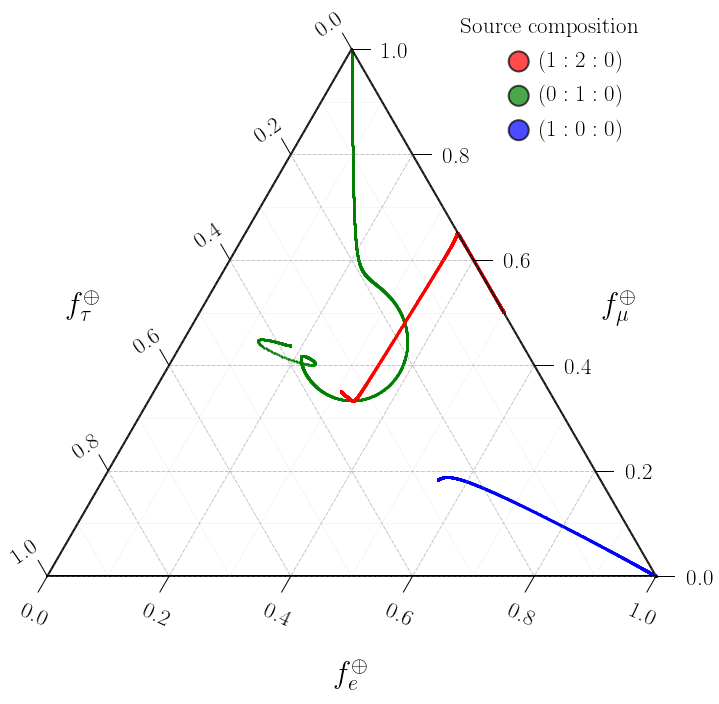

In [16]:
# Figure
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

# Boundary and Gridlines
scale = 1
fig, tax = ternary.figure(ax=ax, scale=scale)

# Draw Boundary and Gridlines
tax.boundary(linewidth=2.0)
tax.gridlines(color='grey', multiple=scale/5., linewidth=1.0, alpha=0.4, ls='--')
tax.gridlines(color='grey', multiple=scale/10., linewidth=0.5, alpha=0.4, ls=':')

# Set Axis labels and Title
fontsize = 23
tax.left_axis_label(r"$f_{\tau}^{\oplus}$", fontsize=fontsize+8, offset=0.2, rotation=0)
tax.right_axis_label(r"$f_{\mu}^{\oplus}$", fontsize=fontsize+8, offset=0.2, rotation=0)
tax.bottom_axis_label(r"$f_{e}^{\oplus}$", fontsize=fontsize+8, position=(0.55, -0.20/2, 0.5), rotation=0)

# Remove default Matplotlib axis
tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()

# Plot
tax.scatter(frs_010, marker='o', s=2, alpha=1, color='green')
tax.scatter(frs_100, marker='o', s=2, alpha=1, color='blue')
tax.scatter(frs_120, marker='o', s=2, alpha=1, color='red')

# Legend
l_size = fontsize
legend_elements = []
legend_elements.append(
    Circle((0., 0.), 0.1, facecolor='red', alpha=0.7, edgecolor='k',
           linewidth=2., label=r'$\left (1:2:0\right )$')
)
legend_elements.append(
    Circle((0., 0.), 0.1, facecolor='green', alpha=0.7, edgecolor='k',
           linewidth=2., label=r'$\left (0:1:0\right )$')
)
legend_elements.append(
    Circle((0., 0.), 0.1, facecolor='blue', alpha=0.7, edgecolor='k',
           linewidth=2., label=r'$\left (1:0:0\right )$')
)
legend = plt.legend(handles=legend_elements, loc=(0.65, 0.8),
                    title='Source composition',
                    fontsize=l_size,
                    handler_map={Circle: HandlerCircle()})
plt.setp(legend.get_title(), fontsize=l_size)
legend.get_frame().set_linestyle('-')

# Set ticks
tax.ticks(axis='blr', multiple=scale/5., linewidth=1, offset=0.03,
          fontsize=fontsize, tick_formats='%.1f')

tax._redraw_labels()

In [17]:
scen = MixingScenario.T12

s = [1, 0, 0]
frs_100_T12 = []
for x in sc:
    u = fr_utils.params_to_BSMu(x, fix_mixing=scen, dim=6, energy=1e6)
    frs_100_T12.append(fr_utils.u_to_fr(s, np.array(u, dtype=np.complex128)))
frs_100_T12 = np.vstack(frs_100_T12)
    
s = [0, 1, 0]
frs_010_T12 = []
for x in sc:
    u = fr_utils.params_to_BSMu(x, fix_mixing=scen, dim=6, energy=1e6)
    frs_010_T12.append(fr_utils.u_to_fr(s, np.array(u, dtype=np.complex128)))
frs_010_T12 = np.vstack(frs_010_T12)

s = [1, 2, 0]
frs_120_T12 = []
for x in sc:
    u = fr_utils.params_to_BSMu(x, fix_mixing=scen, dim=6, energy=1e6)
    frs_120_T12.append(fr_utils.u_to_fr(s, np.array(u, dtype=np.complex128)))
frs_120_T12 = np.vstack(frs_120_T12)

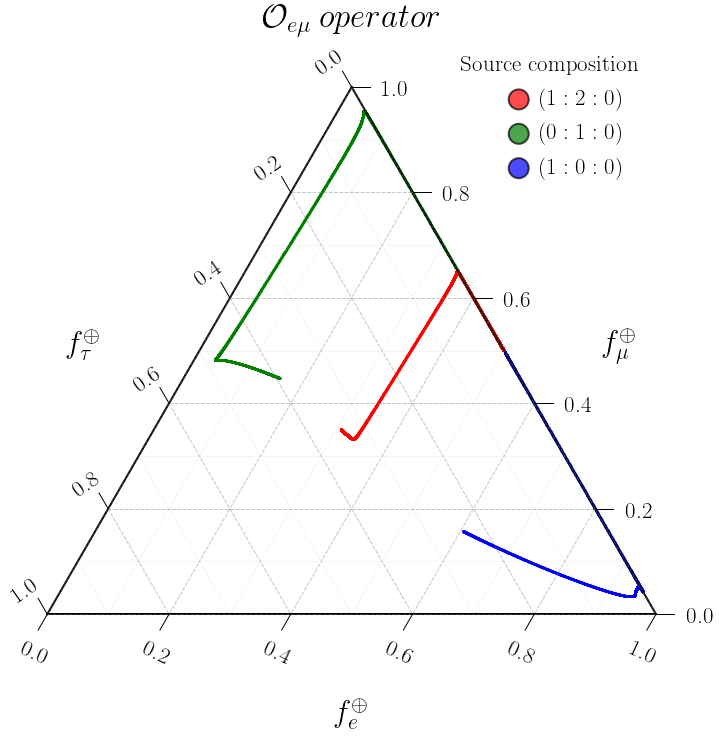

In [18]:
# Figure
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

# Boundary and Gridlines
scale = 1
fig, tax = ternary.figure(ax=ax, scale=scale)

# Draw Boundary and Gridlines
tax.boundary(linewidth=2.0)
tax.gridlines(color='grey', multiple=scale/5., linewidth=1.0, alpha=0.4, ls='--')
tax.gridlines(color='grey', multiple=scale/10., linewidth=0.5, alpha=0.4, ls=':')

# Set Axis labels and Title
fontsize = 23
tax.set_title(r'$\mathcal{O}_{e\mu}\:operator$', fontsize=fontsize+10, pad=35)
tax.left_axis_label(r"$f_{\tau}^{\oplus}$", fontsize=fontsize+8, offset=0.2, rotation=0)
tax.right_axis_label(r"$f_{\mu}^{\oplus}$", fontsize=fontsize+8, offset=0.2, rotation=0)
tax.bottom_axis_label(r"$f_{e}^{\oplus}$", fontsize=fontsize+8, position=(0.55, -0.20/2, 0.5), rotation=0)

# Remove default Matplotlib axis
tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()

# Plot
tax.scatter(frs_010_T12, marker='o', s=2, alpha=1, color='green')
tax.scatter(frs_100_T12, marker='o', s=2, alpha=1, color='blue')
tax.scatter(frs_120_T12, marker='o', s=2, alpha=1, color='red')

# Legend
l_size = fontsize
legend_elements = []
legend_elements.append(
    Circle((0., 0.), 0.1, facecolor='red', alpha=0.7, edgecolor='k',
           linewidth=2., label=r'$\left (1:2:0\right )$')
)
legend_elements.append(
    Circle((0., 0.), 0.1, facecolor='green', alpha=0.7, edgecolor='k',
           linewidth=2., label=r'$\left (0:1:0\right )$')
)
legend_elements.append(
    Circle((0., 0.), 0.1, facecolor='blue', alpha=0.7, edgecolor='k',
           linewidth=2., label=r'$\left (1:0:0\right )$')
)
legend = plt.legend(handles=legend_elements, loc=(0.65, 0.8),
                    title='Source composition',
                    fontsize=l_size,
                    handler_map={Circle: HandlerCircle()})
plt.setp(legend.get_title(), fontsize=l_size)
legend.get_frame().set_linestyle('-')

# Set ticks
tax.ticks(axis='blr', multiple=scale/5., linewidth=1, offset=0.03,
          fontsize=fontsize, tick_formats='%.1f')

tax._redraw_labels()

In [19]:
scen = MixingScenario.T23

s = [1, 0, 0]
frs_100_T23 = []
for x in sc:
    u = fr_utils.params_to_BSMu(x, fix_mixing=scen, dim=6, energy=1e6)
    frs_100_T23.append(fr_utils.u_to_fr(s, np.array(u, dtype=np.complex128)))
frs_100_T23 = np.vstack(frs_100_T23)
    
s = [0, 1, 0]
frs_010_T23 = []
for x in sc:
    u = fr_utils.params_to_BSMu(x, fix_mixing=scen, dim=6, energy=1e6)
    frs_010_T23.append(fr_utils.u_to_fr(s, np.array(u, dtype=np.complex128)))
frs_010_T23 = np.vstack(frs_010_T23)

s = [1, 2, 0]
frs_120_T23 = []
for x in sc:
    u = fr_utils.params_to_BSMu(x, fix_mixing=scen, dim=6, energy=1e6)
    frs_120_T23.append(fr_utils.u_to_fr(s, np.array(u, dtype=np.complex128)))
frs_120_T23 = np.vstack(frs_120_T23)

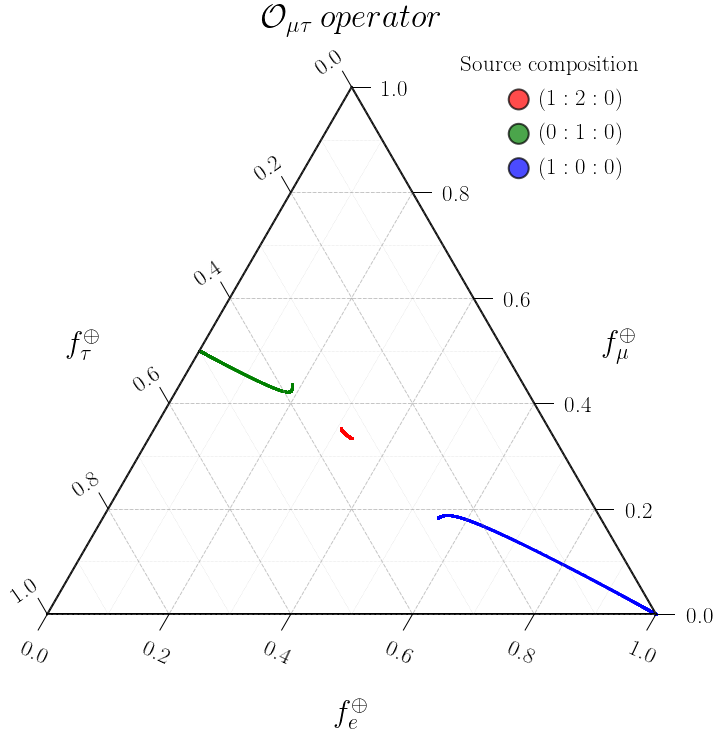

In [20]:
# Figure
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

# Boundary and Gridlines
scale = 1
fig, tax = ternary.figure(ax=ax, scale=scale)

# Draw Boundary and Gridlines
tax.boundary(linewidth=2.0)
tax.gridlines(color='grey', multiple=scale/5., linewidth=1.0, alpha=0.4, ls='--')
tax.gridlines(color='grey', multiple=scale/10., linewidth=0.5, alpha=0.4, ls=':')

# Set Axis labels and Title
fontsize = 23
tax.set_title(r'$\mathcal{O}_{\mu\tau}\:operator$', fontsize=fontsize+10, pad=35)
tax.left_axis_label(r"$f_{\tau}^{\oplus}$", fontsize=fontsize+8, offset=0.2, rotation=0)
tax.right_axis_label(r"$f_{\mu}^{\oplus}$", fontsize=fontsize+8, offset=0.2, rotation=0)
tax.bottom_axis_label(r"$f_{e}^{\oplus}$", fontsize=fontsize+8, position=(0.55, -0.20/2, 0.5), rotation=0)

# Remove default Matplotlib axis
tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()

# Plot
tax.scatter(frs_010_T23, marker='o', s=2, alpha=1, color='green')
tax.scatter(frs_100_T23, marker='o', s=2, alpha=1, color='blue')
tax.scatter(frs_120_T23, marker='o', s=2, alpha=1, color='red')

# Legend
l_size = fontsize
legend_elements = []
legend_elements.append(
    Circle((0., 0.), 0.1, facecolor='red', alpha=0.7, edgecolor='k',
           linewidth=2., label=r'$\left (1:2:0\right )$')
)
legend_elements.append(
    Circle((0., 0.), 0.1, facecolor='green', alpha=0.7, edgecolor='k',
           linewidth=2., label=r'$\left (0:1:0\right )$')
)
legend_elements.append(
    Circle((0., 0.), 0.1, facecolor='blue', alpha=0.7, edgecolor='k',
           linewidth=2., label=r'$\left (1:0:0\right )$')
)
legend = plt.legend(handles=legend_elements, loc=(0.65, 0.8),
                    title='Source composition',
                    fontsize=l_size,
                    handler_map={Circle: HandlerCircle()})
plt.setp(legend.get_title(), fontsize=l_size)
legend.get_frame().set_linestyle('-')

# Set ticks
tax.ticks(axis='blr', multiple=scale/5., linewidth=1, offset=0.03,
          fontsize=fontsize, tick_formats='%.1f')

tax._redraw_labels()

In [21]:
scen = MixingScenario.T13

s = [1, 0, 0]
frs_100_T13 = []
for x in sc:
    u = fr_utils.params_to_BSMu(x, fix_mixing=scen, dim=6, energy=1e6)
    frs_100_T13.append(fr_utils.u_to_fr(s, np.array(u, dtype=np.complex128)))
frs_100_T13 = np.vstack(frs_100_T13)
    
s = [0, 1, 0]
frs_010_T13 = []
for x in sc:
    u = fr_utils.params_to_BSMu(x, fix_mixing=scen, dim=6, energy=1e6)
    frs_010_T13.append(fr_utils.u_to_fr(s, np.array(u, dtype=np.complex128)))
frs_010_T13 = np.vstack(frs_010_T13)

s = [1, 2, 0]
frs_120_T13 = []
for x in sc:
    u = fr_utils.params_to_BSMu(x, fix_mixing=scen, dim=6, energy=1e6)
    frs_120_T13.append(fr_utils.u_to_fr(s, np.array(u, dtype=np.complex128)))
frs_120_T13 = np.vstack(frs_120_T13)

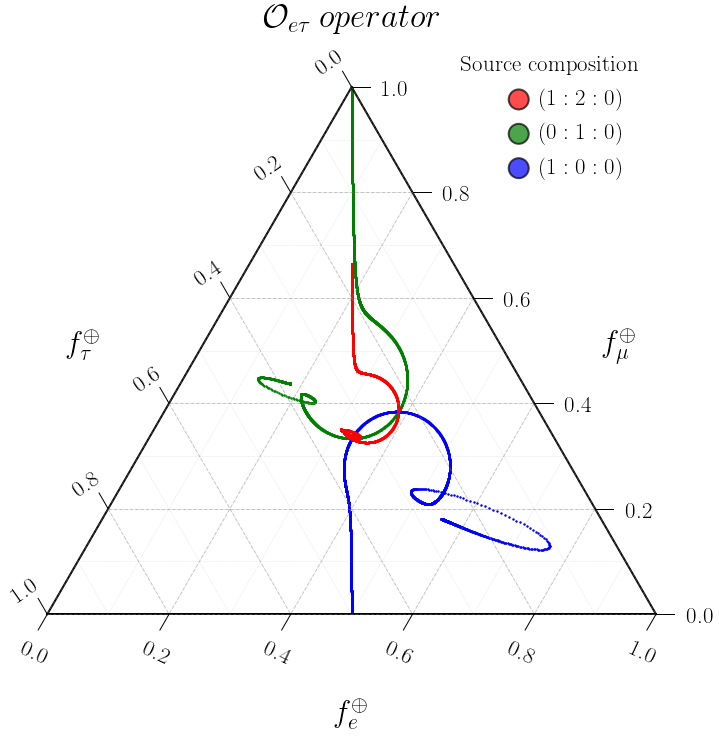

In [22]:
# Figure
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

# Boundary and Gridlines
scale = 1
fig, tax = ternary.figure(ax=ax, scale=scale)

# Draw Boundary and Gridlines
tax.boundary(linewidth=2.0)
tax.gridlines(color='grey', multiple=scale/5., linewidth=1.0, alpha=0.4, ls='--')
tax.gridlines(color='grey', multiple=scale/10., linewidth=0.5, alpha=0.4, ls=':')

# Set Axis labels and Title
fontsize = 23
tax.set_title(r'$\mathcal{O}_{e\tau}\:operator$', fontsize=fontsize+10, pad=35)
tax.left_axis_label(r"$f_{\tau}^{\oplus}$", fontsize=fontsize+8, offset=0.2, rotation=0)
tax.right_axis_label(r"$f_{\mu}^{\oplus}$", fontsize=fontsize+8, offset=0.2, rotation=0)
tax.bottom_axis_label(r"$f_{e}^{\oplus}$", fontsize=fontsize+8, position=(0.55, -0.20/2, 0.5), rotation=0)

# Remove default Matplotlib axis
tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()

# Plot
tax.scatter(frs_010_T13, marker='o', s=2, alpha=1, color='green')
tax.scatter(frs_100_T13, marker='o', s=2, alpha=1, color='blue')
tax.scatter(frs_120_T13, marker='o', s=2, alpha=1, color='red')

# Legend
l_size = fontsize
legend_elements = []
legend_elements.append(
    Circle((0., 0.), 0.1, facecolor='red', alpha=0.7, edgecolor='k',
           linewidth=2., label=r'$\left (1:2:0\right )$')
)
legend_elements.append(
    Circle((0., 0.), 0.1, facecolor='green', alpha=0.7, edgecolor='k',
           linewidth=2., label=r'$\left (0:1:0\right )$')
)
legend_elements.append(
    Circle((0., 0.), 0.1, facecolor='blue', alpha=0.7, edgecolor='k',
           linewidth=2., label=r'$\left (1:0:0\right )$')
)
legend = plt.legend(handles=legend_elements, loc=(0.65, 0.8),
                    title='Source composition',
                    fontsize=l_size,
                    handler_map={Circle: HandlerCircle()})
plt.setp(legend.get_title(), fontsize=l_size)
legend.get_frame().set_linestyle('-')

# Set ticks
tax.ticks(axis='blr', multiple=scale/5., linewidth=1, offset=0.03,
          fontsize=fontsize, tick_formats='%.1f')

tax._redraw_labels()

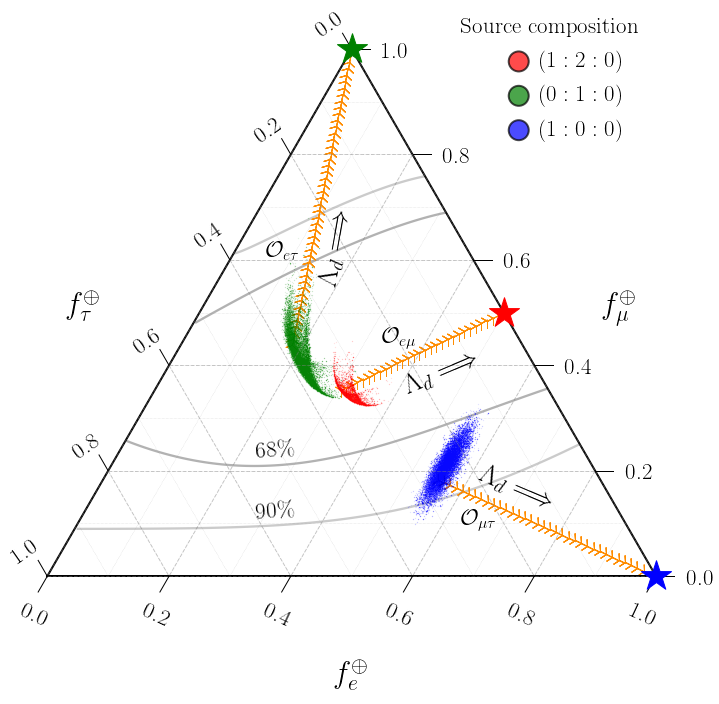

In [23]:
# Figure
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

# Boundary and Gridlines
scale = 1
fig, tax = ternary.figure(ax=ax, scale=scale)

# Draw Boundary and Gridlines
tax.boundary(linewidth=2.0)
tax.gridlines(color='grey', multiple=scale/5., linewidth=1.0, alpha=0.4, ls='--')
tax.gridlines(color='grey', multiple=scale/10., linewidth=0.5, alpha=0.4, ls=':')

# Set Axis labels and Title
fontsize = 23
tax.left_axis_label(r"$f_{\tau}^{\oplus}$", fontsize=fontsize+8, offset=0.2, rotation=0)
tax.right_axis_label(r"$f_{\mu}^{\oplus}$", fontsize=fontsize+8, offset=0.2, rotation=0)
tax.bottom_axis_label(r"$f_{e}^{\oplus}$", fontsize=fontsize+8, position=(0.55, -0.20/2, 0.5), rotation=0)

# Remove default Matplotlib axis
tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()

# Plot
tax.scatter(sm_010, marker='.', s=0.2, alpha=0.2, color='green')
tax.scatter(sm_100, marker='.', s=0.2, alpha=0.2, color='blue')
tax.scatter(sm_120, marker='.', s=0.2, alpha=0.2, color='red')
tax.scatter([[0.5, 0.5, 0]], marker='*', s=1000, alpha=1.0, color='red', zorder=100)
tax.scatter([[0, 1, 0]], marker='*', s=1000, alpha=1.0, color='green', zorder=100)
tax.scatter([[1, 0, 0]], marker='*', s=1000, alpha=1.0, color='blue', zorder=100)

# Contour
tax.plot(contour_68_upper, linewidth=2.3, color='grey', zorder=0, alpha=0.6)
tax.plot(contour_68_lower, linewidth=2.3, color='grey', zorder=0, alpha=0.6)
tax.plot(contour_90_upper, linewidth=2.3, color='darkgrey', zorder=0, alpha=0.6)
tax.plot(contour_90_lower, linewidth=2.3, color='darkgrey', zorder=0, alpha=0.6)

# Lines
marker_style = dict(
    linestyle=' ', color='darkorange', linewidth=1.2,
    markersize=14, zorder=0
)

p1 = (0.18301213, 0.43765598, 0.37933189)
p2 = (0, 1, 0)
divisions = 46
x_d = np.linspace(p1[0], p2[0], divisions+1)
y_d = np.linspace(p1[1], p2[1], divisions+1)
z_d = np.linspace(p1[2], p2[2], divisions+1)
for n in xrange(divisions-2):
    p = (x_d[n], y_d[n], z_d[n])
    q = (x_d[n+1], y_d[n+1], z_d[n+1])
    tax.line(p, q, marker=(3, 2, 180+46.5), **marker_style)

p1 = (0.55003613, 0.18301213, 0.26695174)
p2 = (1, 0, 0)
divisions = 35
x_d = np.linspace(p1[0], p2[0], divisions+1)
y_d = np.linspace(p1[1], p2[1], divisions+1)
z_d = np.linspace(p1[2], p2[2], divisions+1)
for n in xrange(divisions-2):
    p = (x_d[n], y_d[n], z_d[n])
    q = (x_d[n+1], y_d[n+1], z_d[n+1])
    tax.line(p, q, marker=(3, 2, 180+63), **marker_style)
    
p1 = (0.30535346, 0.3527747, 0.34187184)
p2 = (0.5, 0.5, 0)
divisions = 29
x_d = np.linspace(p1[0], p2[0], divisions+1)
y_d = np.linspace(p1[1], p2[1], divisions+1)
z_d = np.linspace(p1[2], p2[2], divisions+1)
for n in xrange(divisions-2):
    p = (x_d[n], y_d[n], z_d[n])
    q = (x_d[n+1], y_d[n+1], z_d[n+1])
    tax.line(p, q, marker=(3, 2, 180), **marker_style)

# Text
ax.text(0.55, 0.39, r'$\mathcal{O}_{e\mu}$', fontsize=fontsize,
       rotation=0, verticalalignment='center')
ax.text(0.58, 0.33, r'$\Lambda_d\Longrightarrow$', fontsize=fontsize+5,
       rotation=23, verticalalignment='center')
ax.text(0.36, 0.53, r'$\mathcal{O}_{e\tau}$', fontsize=fontsize,
       rotation=0, verticalalignment='center')
ax.text(0.445, 0.54, r'$\Lambda_d\Longrightarrow$', fontsize=fontsize+5,
       rotation=80, verticalalignment='center')
ax.text(0.68, 0.09, r'$\mathcal{O}_{\mu\tau}$', fontsize=fontsize,
       rotation=0, verticalalignment='center')
ax.text(0.7, 0.14, r'$\Lambda_d\Longrightarrow$', fontsize=fontsize+5,
       rotation=-23, verticalalignment='center')
ax.text(0.34, 0.2, r'$68\%$', fontsize=fontsize, rotation=5)
ax.text(0.34, 0.1, r'$90\%$', fontsize=fontsize, rotation=5)

# Legend
l_size = fontsize
legend_elements = []
legend_elements.append(
    Circle((0., 0.), 0.1, facecolor='red', alpha=0.7, edgecolor='k',
           linewidth=2., label=r'$\left (1:2:0\right )$')
)
legend_elements.append(
    Circle((0., 0.), 0.1, facecolor='green', alpha=0.7, edgecolor='k',
           linewidth=2., label=r'$\left (0:1:0\right )$')
)
legend_elements.append(
    Circle((0., 0.), 0.1, facecolor='blue', alpha=0.7, edgecolor='k',
           linewidth=2., label=r'$\left (1:0:0\right )$')
)
legend = plt.legend(handles=legend_elements, loc=(0.65, 0.8),
                    title='Source composition',
                    fontsize=l_size,
                    handler_map={Circle: HandlerCircle()})
plt.setp(legend.get_title(), fontsize=l_size)
legend.get_frame().set_linestyle('-')

# Set ticks
tax.ticks(axis='blr', multiple=scale/5., linewidth=1, offset=0.03,
          fontsize=fontsize, tick_formats='%.1f')

tax._redraw_labels()

# save
fig.savefig('./plots/fr_star.png', bbox_inches='tight', dpi=150)

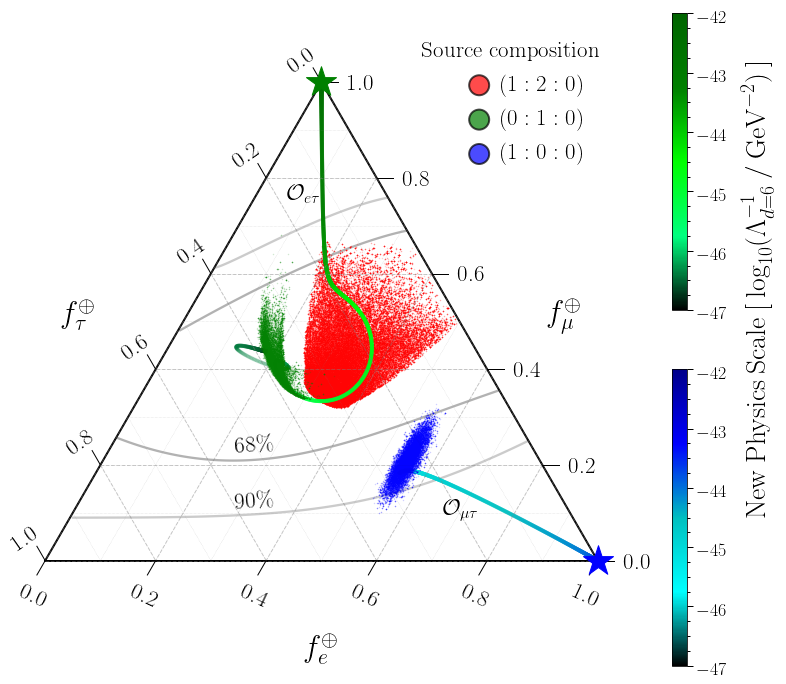

In [83]:
# Figure
fig = plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(1, 2, width_ratios=[40, 1])
gs.update(hspace=0.4, wspace=0.15)

ax = fig.add_subplot(gs[0])
ax.set_aspect('equal')

norm = mpl.colors.Normalize(vmin=np.min(sc), vmax=np.max(sc))

# Boundary and Gridlines
scale = 1
fig, tax = ternary.figure(ax=ax, scale=scale)

# Draw Boundary and Gridlines
tax.boundary(linewidth=2.0)
tax.gridlines(color='grey', multiple=scale/5., linewidth=1.0, alpha=0.4, ls='--')
tax.gridlines(color='grey', multiple=scale/10., linewidth=0.5, alpha=0.4, ls=':')

# Set Axis labels and Title
fontsize = 23
tax.left_axis_label(r"$f_{\tau}^{\oplus}$", fontsize=fontsize+8, offset=0.2, rotation=0)
tax.right_axis_label(r"$f_{\mu}^{\oplus}$", fontsize=fontsize+8, offset=0.2, rotation=0)
tax.bottom_axis_label(r"$f_{e}^{\oplus}$", fontsize=fontsize+8, position=(0.55, -0.20/2, 0.5), rotation=0)

# Remove default Matplotlib axis
tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()

# Plot
tax.scatter(sm_010, marker='.', s=0.8, alpha=0.2, color='green', zorder=90)
tax.scatter(sm_100, marker='.', s=0.8, alpha=0.2, color='blue', zorder=90)
tax.scatter(sm_120_uni, marker='.', s=0.8, alpha=0.2, color='red')
tax.scatter([[0, 1, 0]], marker='*', s=1000, alpha=1.0, color='green', zorder=100)
tax.scatter([[1, 0, 0]], marker='*', s=1000, alpha=1.0, color='blue', zorder=100)

# Contour
tax.plot(contour_68_upper, linewidth=2.3, color='grey', zorder=0, alpha=0.6)
tax.plot(contour_68_lower, linewidth=2.3, color='grey', zorder=0, alpha=0.6)
tax.plot(contour_90_upper, linewidth=2.3, color='darkgrey', zorder=0, alpha=0.6)
tax.plot(contour_90_lower, linewidth=2.3, color='darkgrey', zorder=0, alpha=0.6)

# Lines
marker_style = dict(
    linestyle=' ', color='darkorange', linewidth=1.2,
    markersize=14, zorder=0
)

# Trajectories
def alp(x):
    y = list(x)
    y[-1] = 0.2
    return y

#cmap = mpl.cm.hsv
cmap_b = mpl.colors.LinearSegmentedColormap.from_list("", ["black", "aqua", "blue"])
cmap_g = mpl.colors.LinearSegmentedColormap.from_list("", ["black", "lime", "green"])
#cmap_b = mpl.colors.LinearSegmentedColormap.from_list("", ["black", "aqua", "c", "blue", "darkblue"])
#cmap_g = mpl.colors.LinearSegmentedColormap.from_list("", ["black", "springgreen", "lime", "green", "darkgreen"])
#cmap_r = mpl.colors.LinearSegmentedColormap.from_list("", ["black", "lightsalmon", "red"])
c_g = map(alp, map(cmap_g, map(norm, sc)))
tax.scatter(frs_010_T13, marker='o', s=10, color=c_g)
c_b= map(alp, map(cmap_b, map(norm, sc)))
tax.scatter(frs_100_T23, marker='o', s=10, color=c_b)
#c_r= map(alp, map(cmap_r, map(norm, sc)))
#tax.scatter(frs_120_T12, marker='o', s=10, color=c_r)

# Text
#ax.text(0.63, 0.46, r'$\mathcal{O}_{e\mu}$', fontsize=fontsize,
#       rotation=0, verticalalignment='center')
ax.text(0.437, 0.66, r'$\mathcal{O}_{e\tau}$', fontsize=fontsize,
       rotation=0, verticalalignment='center')
ax.text(0.72, 0.09, r'$\mathcal{O}_{\mu\tau}$', fontsize=fontsize,
       rotation=0, verticalalignment='center')
ax.text(0.34, 0.2, r'$68\%$', fontsize=fontsize, rotation=5)
ax.text(0.34, 0.1, r'$90\%$', fontsize=fontsize, rotation=5)

# Legend
l_size = fontsize
legend_elements = []
legend_elements.append(
    Circle((0., 0.), 0.1, facecolor='red', alpha=0.7, edgecolor='k',
           linewidth=2., label=r'$\left (1:2:0\right )$')
)
legend_elements.append(
    Circle((0., 0.), 0.1, facecolor='green', alpha=0.7, edgecolor='k',
           linewidth=2., label=r'$\left (0:1:0\right )$')
)
legend_elements.append(
    Circle((0., 0.), 0.1, facecolor='blue', alpha=0.7, edgecolor='k',
           linewidth=2., label=r'$\left (1:0:0\right )$')
)
legend = plt.legend(handles=legend_elements, loc=(0.65, 0.8),
                    title='Source composition',
                    fontsize=l_size,
                    handler_map={Circle: HandlerCircle()})
plt.setp(legend.get_title(), fontsize=l_size)
legend.get_frame().set_linestyle('-')

# Colorbar
gs00 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[1])
ax0 = fig.add_subplot(gs00[0])
cb = mpl.colorbar.ColorbarBase(ax0, cmap=cmap_g, norm=norm)
cb.ax.tick_params(labelsize=fontsize-5)
ax1 = fig.add_subplot(gs00[1])
cb = mpl.colorbar.ColorbarBase(ax1, cmap=cmap_b, norm=norm)
cb.ax.tick_params(labelsize=fontsize-5)
cb.set_label(r'${\rm New\:Physics\:Scale}\:[\:{\rm log}_{10} (\Lambda^{-1}_{d=6}\:/\:{\rm GeV}^{-2})\: ]$',
            fontsize=fontsize+5, labelpad=20, horizontalalignment='left')
#ax2 = fig.add_subplot(gs00[2])
#cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap_r, norm=norm)
#cb.ax.tick_params(labelsize=fontsize-5)

# Set ticks
tax.ticks(axis='blr', multiple=scale/5., linewidth=1, offset=0.03,
          fontsize=fontsize, tick_formats='%.1f')

tax._redraw_labels()

# save
fig.savefig('./plots/fr_star.png', bbox_inches='tight', dpi=150)